In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("height_weight_knn.csv")
print(df.shape)
print(df.columns)

(25, 3)
Index(['Weight(x2)', 'Height(y2)', 'Class'], dtype='object')


In [4]:
group = df["Class"].value_counts().index.values[:8]
counts = df["Class"].value_counts().values[:8]

print ("class names", group)
print ("class counts", counts)

class names ['Normal' 'Underweight' 'Overweight']
class counts [10  8  7]


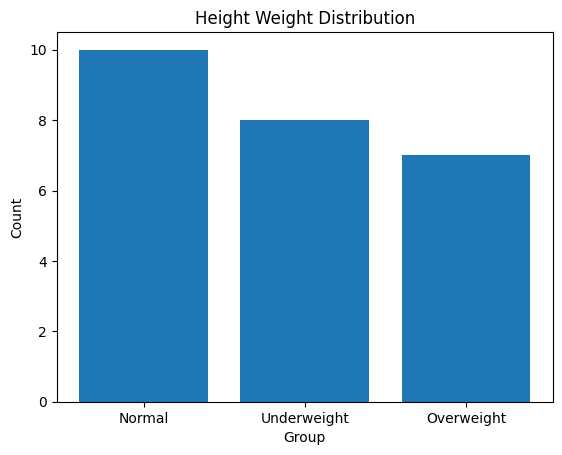

In [8]:
plt.bar(x=group, height=counts)
plt.title("Height Weight Distribution")
plt.xlabel("Group")
plt.ylabel("Count")
plt.savefig("height_weight.png")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
print(df.shape)
X = df.drop("Class",axis=1)
y = df["Class"]

# print(f"values of X:{X.values}")
# print(f"values of y:{y.values}")
# print (X.shape,y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

(25, 3)


In [11]:
print(X_train.head())

    Weight(x2)  Height(y2)
9           63         165
13          65         168
1           66         177
22          72         175
5           82         170


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [21]:
kmn = KNeighborsClassifier(n_neighbors=2)
kmn.fit(X_train,y_train)
y_pred = kmn.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy:0.6
              precision    recall  f1-score   support

      Normal       0.50      1.00      0.67         2
  Overweight       0.00      0.00      0.00         2
 Underweight       1.00      1.00      1.00         1

    accuracy                           0.60         5
   macro avg       0.50      0.67      0.56         5
weighted avg       0.40      0.60      0.47         5



c:\Users\freef\OneDrive\Desktop\notes\6th sem\Labs\AI\Lab1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\freef\OneDrive\Desktop\notes\6th sem\Labs\AI\Lab1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\freef\OneDrive\Desktop\notes\6th sem\Labs\AI\Lab1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

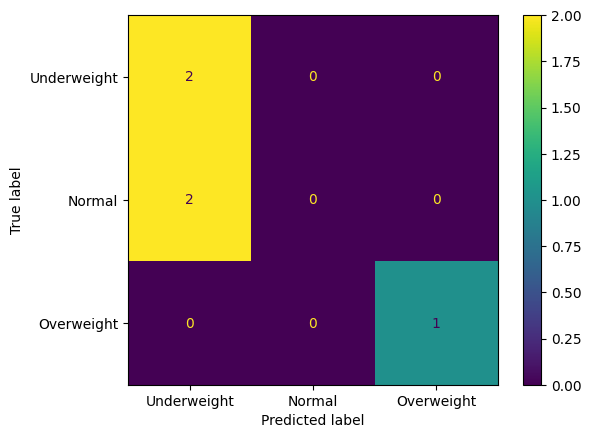

In [26]:
matrix = confusion_matrix(y_test,y_pred)
matrix_plot = ConfusionMatrixDisplay(matrix,display_labels=df["Class"].unique())
matrix_plot.plot()
plt.savefig("height_confusion_matrix.png")

In [32]:
pred = kmn.predict([[40,100]])
print(pred)


['Normal']


c:\Users\freef\OneDrive\Desktop\notes\6th sem\Labs\AI\Lab1\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [33]:
import joblib
joblib.dump(kmn,"model.joblib")




['model.joblib']